In [3]:
################## remover célular antes de upar
## para usar o data set de fireballs transferindo da pasta do Drive, no Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# notebook para verificar regressão linear no dataset sobre Fireballs
#import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import log
from scipy.stats import linregress

In [12]:
#df = pd.read_csv('/content/drive/My Drive/Datasets/cneos_fireball_data.csv')
df = pd.read_csv('datasets/cneos_fireball_data.csv')

df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-04-15 08:22:01,20.1S,36.0E,41.4,17.2,1.6,-14.7,8.8,3.097000e+12,6.300
1,2023-04-06 14:47:39,57.4N,109.9E,31.2,22.1,8.6,3.6,-20.0,7.200000e+10,0.230
2,2023-04-01 00:02:03,16.8S,76.0E,61.8,46.4,21.4,-40.6,7.1,2.400000e+10,0.086
3,2023-03-20 06:53:23,23.7S,132.6E,34.8,NaN,NaN,NaN,NaN,2.700000e+10,0.095
4,2023-03-11 08:21:28,74.7S,79.5E,32.0,NaN,NaN,NaN,NaN,4.440000e+11,1.100


<Axes: xlabel='Total Radiated Energy (J) - log[10]', ylabel='Calculated Total Impact Energy (kt) - log[100]'>

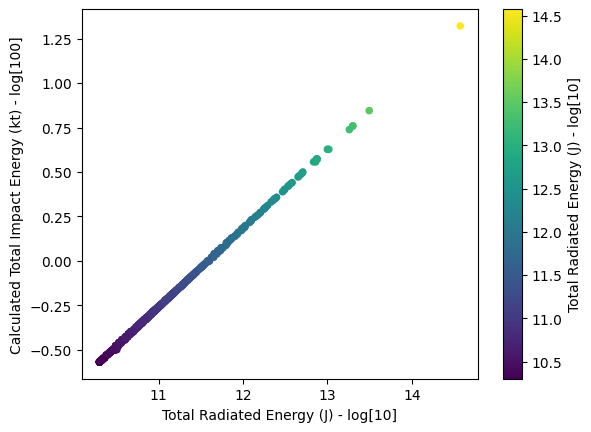

In [13]:
# Como visto nos notebooks anteriores, há uma correlação forte entre a Energia Irradiada no evento 
# e a Energia Total de Impacto 

radiated_energy_log = np.log10(df['Total Radiated Energy (J)'])
df['Total Radiated Energy (J) - log[10]'] = radiated_energy_log

impact_energy_log = np.array([log(x,100) for x in df['Calculated Total Impact Energy (kt)']])
df['Calculated Total Impact Energy (kt) - log[100]'] = impact_energy_log
df.plot.scatter(x = 'Total Radiated Energy (J) - log[10]',
                y = 'Calculated Total Impact Energy (kt) - log[100]',
                c='Total Radiated Energy (J) - log[10]',
                colormap='viridis')

<Axes: xlabel='Total Radiated Energy (J)', ylabel='Calculated Total Impact Energy (kt)'>

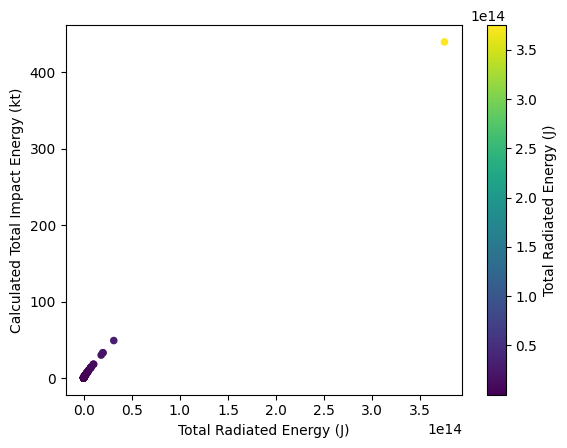

In [14]:
# gráfico de dispersão sem escala logarítmica
df.plot.scatter(x = 'Total Radiated Energy (J)',
                y = 'Calculated Total Impact Energy (kt)',
                c = 'Total Radiated Energy (J)',
                colormap='viridis')

In [12]:
# Pelo gráfico de dispersão, é possível visualizar uma relação linear entre essas variáveis
# Buscaremos um modelo de regressão linear que nos permita estimar a Energia Total de Impacto a
# partir da Energia Irradiada

In [15]:
res = linregress(df['Total Radiated Energy (J)'], df['Calculated Total Impact Energy (kt)'])
print('res.slope =', res.slope, '\tres.intercept =', res.intercept)

res.slope = 1.1821253774296196e-12 	res.intercept = 0.33376579176366916


In [16]:
# definindo a função linear a partir dos coeficientes obtidos com a função linregress()
def impact_energy(radiated_energy):
  return radiated_energy*res.slope + res.intercept

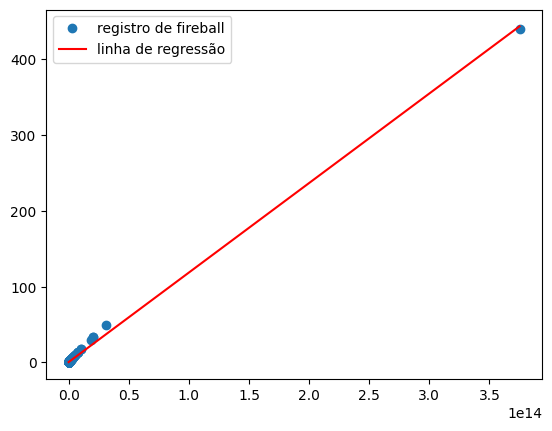

In [24]:
# plotando linha de regressão no gráfico de dispersão
x = df['Total Radiated Energy (J)']
y = df['Calculated Total Impact Energy (kt)']
x_test = np.linspace(df['Total Radiated Energy (J)'].min(),df['Total Radiated Energy (J)'].max(), 100)
plt.plot(x, y, 'o', label='registro de fireball')
plt.plot(x_test, impact_energy(x_test), 'r', label='linha de regressão')
plt.legend()
plt.show()

In [9]:
df['Total Radiated Energy (J)'].min()

20000000000.0

In [10]:
df['Total Radiated Energy (J)'].max()

375000000000000.0

In [27]:
##x_test = np.linspace(df['Total Radiated Energy (J)'].min(),df['Total Radiated Energy (J)'].max(), 100)
########### 